Step 1: Get a sample corpus


In [1]:
from nltk.corpus import reuters
# if this fails you might need to ensure that you've downloaded this resource

In [2]:
import nltk  
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.probability import MLEProbDist as U
import numpy as np  
import random  
import string
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [3]:
import pylab 
import scipy.stats as stats

In [4]:
base_corpus_tokens = []

In [5]:
num_docs = len(reuters.fileids())
#  this has a large number of files... 
# you might wish to limit the number of documents you use while developing your technique 
# ex. reuters.fileids()[0:25]
for doc in reuters.fileids()[0:10]: 
    doc_text = reuters.open(doc).read()
    # this doc_text variable will give you a text version of the news article. This could be tokenized.

Step 2: Get a potential jargon corpus

In [6]:
import os
import nltk.data
from os import listdir
from os.path import isfile, join
from nltk.util import bigrams 
from nltk.tokenize import TreebankWordTokenizer
from io import open
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()

dir_base = "C:/Users/Place Holder/Documents/GitHub/New/f19_ds_nlp/homeworks/homework_2/data/"


def read_file(filename):
    input_file_text = open(filename , encoding='utf-8').read()
    return input_file_text

    
def read_directory_files(directory):
    file_texts = []
    files = [f for f in listdir(directory) if isfile(join(directory, f))]
    for f in files:
        file_text = read_file(join(directory, f))
        file_texts.append({"file":f, "content": file_text })
    return file_texts
    
jargon_corpus = read_directory_files(dir_base)
print(jargon_corpus)

[{'file': 'air-forces-f-15-eagle-passiveactive-warning-survivability-system-dodig-2018-121', 'content': '\n\n\nMay 21, 2018  —\n\n\n\nObjective:\nWe determined whether Air Force officials updated the Eagle Passive/Active Warning and Survivability System (EPAWSS) test and evaluation master plan to respond to concerns raised by Air Force and DoD test officials, developed an EPAWSS design that can meet capability requirements, and evaluated the F-15C EPAWSS production plan during the engineering and manufacturing development phase.\nBackground:\nThe Air Force’s EPAWSS program is an acquisition category IC major defense program with estimated program costs of $876 million in research, development, test, and evaluation, and $3.4 billion in procurement.1 EPAWSS upgrades F-15C and F-15E aircraft electronic warfare capabilities to detect and identify air and ground threats, employ counter-measures, and jam enemy radar signals. The F-15 is an all-weather, day and night, tactical fighter aircraf

In [7]:
jargon_corpus= ''.join(map(str, jargon_corpus))

In [31]:
jcstring1 = jargon_corpus.replace('\\n', ' ').replace('\\xa0',' ').replace('\'',' ').replace("' ", "").replace(", ", "").replace(": ", "").replace(". ", "").replace("; ", "").replace('(', "").replace(')',"").replace('’', "").replace('$', "").replace('—', "")
jcstring1

'{ file  air-forces-f-15-eagle-passiveactive-warning-survivability-system-dodig-2018-121  content     May 212018      ObjectiveWe determined whether Air Force officials updated the Eagle Passive/Active Warning and Survivability System EPAWSS test and evaluation master plan to respond to concerns raised by Air Force and DoD test officialsdeveloped an EPAWSS design that can meet capability requirementsand evaluated the F-15C EPAWSS production plan during the engineering and manufacturing development phaseBackgroundThe Air Forces EPAWSS program is an acquisition category IC major defense program with estimated program costs of 876 million in researchdevelopmenttestand evaluationand 3.4 billion in procurement.1 EPAWSS upgrades F-15C and F-15E aircraft electronic warfare capabilities to detect and identify air and ground threatsemploy counter-measuresand jam enemy radar signalsThe F-15 is an all-weatherday and nighttactical fighter aircraft designed to gain and maintain control over the bat

In [9]:
word_tokens = word_tokenize(jcstring1) 

In [10]:
# perhaps you could store tokens from the jargon corpus here
stopwords_en = set(stopwords.words('english'))
jargon_tokens = []
for sent in word_tokens:
    jargon_tokens.append(' '.join(w for w in nltk.word_tokenize(sent) if w.lower() not in stopwords_en))
print(jargon_tokens)

['{', 'file', 'air-forces-f-15-eagle-passiveactive-warning-survivability-system-dodig-2018-121', 'content', 'May', '212018', 'ObjectiveWe', 'determined', 'whether', 'Air', 'Force', 'officials', 'updated', '', 'Eagle', 'Passive/Active', 'Warning', '', 'Survivability', 'System', 'EPAWSS', 'test', '', 'evaluation', 'master', 'plan', '', 'respond', '', 'concerns', 'raised', '', 'Air', 'Force', '', 'DoD', 'test', 'officialsdeveloped', '', 'EPAWSS', 'design', '', '', 'meet', 'capability', 'requirementsand', 'evaluated', '', 'F-15C', 'EPAWSS', 'production', 'plan', '', '', 'engineering', '', 'manufacturing', 'development', 'phaseBackgroundThe', 'Air', 'Forces', 'EPAWSS', 'program', '', '', 'acquisition', 'category', 'IC', 'major', 'defense', 'program', '', 'estimated', 'program', 'costs', '', '876', 'million', '', 'researchdevelopmenttestand', 'evaluationand', '3.4', 'billion', '', 'procurement.1', 'EPAWSS', 'upgrades', 'F-15C', '', 'F-15E', 'aircraft', 'electronic', 'warfare', 'capabilities'

In [11]:
doc_text

'SUMITOMO BANK AIMS AT QUICK RECOVERY FROM MERGER\n  Sumitomo Bank Ltd &lt;SUMI.T> is certain to\n  lose its status as Japan\'s most profitable bank as a result of\n  its merger with the Heiwa Sogo Bank, financial analysts said.\n      Osaka-based Sumitomo, with desposits of around 23.9\n  trillion yen, merged with Heiwa Sogo, a small, struggling bank\n  with an estimated 1.29 billion dlrs in unrecoverable loans, in\n  October.\n      But despite the link-up, Sumitomo President Koh Komatsu\n  told Reuters he is confident his bank can quickly regain its\n  position.\n      "We\'ll be back in position in first place within three\n  years," Komatsu said in an interview.\n      He said that while the merger will initially reduce\n  Sumitomo\'s profitability and efficiency, it will vastly expand\n  Sumitomo\'s branch network in the Tokyo metropolitan area where\n  it has been relatively weak.\n      But financial analysts are divided on whether and how\n  quickly the gamble will pay off.\n 

In [12]:
base_corpus= ''.join(map(str, doc_text))

In [32]:
jcstring2 = base_corpus.replace('\\n', ' ').replace('\\xa0',' ').replace('\'',' ').replace("' ", "").replace(", ", "").replace(": ", "").replace(". ", "").replace("; ", "").replace('(', "").replace(')',"").replace('’', "").replace('$', "").replace('—', "").replace('\n', ' ')
jcstring2

'SUMITOMO BANK AIMS AT QUICK RECOVERY FROM MERGER   Sumitomo Bank Ltd &lt;SUMI.T> is certain to   lose its status as Japan s most profitable bank as a result of   its merger with the Heiwa Sogo Bankfinancial analysts said.       Osaka-based Sumitomowith desposits of around 23.9   trillion yenmerged with Heiwa Sogoa smallstruggling bank   with an estimated 1.29 billion dlrs in unrecoverable loansin   October.       But despite the link-upSumitomo President Koh Komatsu   told Reuters he is confident his bank can quickly regain its   position.       "We ll be back in position in first place within three   years," Komatsu said in an interview.       He said that while the merger will initially reduce   Sumitomo s profitability and efficiencyit will vastly expand   Sumitomo s branch network in the Tokyo metropolitan area where   it has been relatively weak.       But financial analysts are divided on whether and how   quickly the gamble will pay off.       Some said Sumitomo may have paid t

In [14]:
base_corpus_tokens = word_tokenize(jcstring2) 

In [15]:
print (base_corpus_tokens)

['SUMITOMO', 'BANK', 'AIMS', 'AT', 'QUICK', 'RECOVERY', 'FROM', 'MERGER', 'Sumitomo', 'Bank', 'Ltd', '&', 'lt', ';', 'SUMI.T', '>', 'is', 'certain', 'to', 'lose', 'its', 'status', 'as', 'Japan', 's', 'most', 'profitable', 'bank', 'as', 'a', 'result', 'of', 'its', 'merger', 'with', 'the', 'Heiwa', 'Sogo', 'Bankfinancial', 'analysts', 'said', '.', 'Osaka-based', 'Sumitomowith', 'desposits', 'of', 'around', '23.9', 'trillion', 'yenmerged', 'with', 'Heiwa', 'Sogoa', 'smallstruggling', 'bank', 'with', 'an', 'estimated', '1.29', 'billion', 'dlrs', 'in', 'unrecoverable', 'loansin', 'October', '.', 'But', 'despite', 'the', 'link-upSumitomo', 'President', 'Koh', 'Komatsu', 'told', 'Reuters', 'he', 'is', 'confident', 'his', 'bank', 'can', 'quickly', 'regain', 'its', 'position', '.', '``', 'We', 'll', 'be', 'back', 'in', 'position', 'in', 'first', 'place', 'within', 'three', 'years', ',', "''", 'Komatsu', 'said', 'in', 'an', 'interview', '.', 'He', 'said', 'that', 'while', 'the', 'merger', 'will'

In [16]:
type(jargon_tokens)

list

In [17]:
unique = set(jargon_tokens)-set(base_corpus_tokens)

In [18]:
unique

{'',
 'statements',
 'warfare',
 'managed',
 'Comptroller',
 'audit',
 'nonstatistical',
 'quantity',
 'quarter',
 'footwear',
 'SPMYM2-15-C-0007',
 'reportThe',
 'Reduction',
 'release',
 'leases',
 'duplicate',
 'poorly',
 'technology',
 'report',
 'administered',
 'independent',
 'Threat',
 'former',
 'Administration',
 'file',
 'WHSDoDHRAand',
 'allegationswe',
 'Acquisitioncommenting',
 'controls',
 'invoices',
 'actionsSpecificallythe',
 're-validate',
 'Logistics•',
 '2533atitle',
 'adequate',
 'incentivizes',
 'held',
 'lack',
 'Authorization',
 'AF/A5/8',
 'developmentThe',
 '40.3',
 'reemphasized',
 'quantitiesUsing',
 'periodif',
 'defense-organizations-price-reasonableness-determinations-for-federal-supply-sc',
 'Committee',
 '49',
 'riska',
 'F-15',
 'directs',
 'implementation',
 'stealth',
 'programs',
 'StatesThe',
 'ATO',
 'decisions',
 'strategyThereforethe',
 'stopped',
 'NoD2016-D000CG-0140.000',
 'identifyplanprioritizeand',
 'Powers',
 'millionawarded',
 'occurred

In [19]:
nltk.jaccard_distance(set(jargon_tokens),set(unique))

0.03468586387434555

In [20]:
freq_jargon = nltk.FreqDist(jargon_tokens)

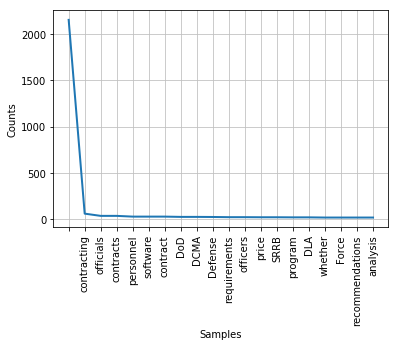

In [21]:
freq_jargon.plot(20)

In [22]:
freq_jargon.most_common(50)

[('', 2152),
 ('contracting', 63),
 ('officials', 39),
 ('contracts', 39),
 ('personnel', 31),
 ('software', 31),
 ('contract', 31),
 ('DoD', 28),
 ('DCMA', 28),
 ('Defense', 27),
 ('requirements', 25),
 ('officers', 25),
 ('price', 24),
 ('SRRB', 24),
 ('program', 23),
 ('DLA', 23),
 ('whether', 21),
 ('Force', 21),
 ('recommendations', 21),
 ('analysis', 21),
 ('Air', 20),
 ('EPAWSS', 20),
 ('Director', 20),
 ('service', 20),
 ('Federal', 19),
 ('training', 19),
 ('ensure', 18),
 ('guidance', 18),
 ('F-15C', 17),
 ('development', 17),
 ('risk', 17),
 ('Berry', 17),
 ('Act', 17),
 ('controls', 16),
 ('USPACOM', 16),
 ('DCS', 15),
 ('testing', 15),
 ('Agency', 15),
 ('noncompliant', 15),
 ('Amendment', 15),
 ('determined', 14),
 ('develop', 14),
 ('review', 14),
 ('business', 14),
 ('Office', 14),
 ('F-22', 14),
 ('services', 14),
 ('ATO', 14),
 ('high', 14),
 ('Chief', 13)]

In [23]:
freq_jargon

FreqDist({'': 2152, 'contracting': 63, 'officials': 39, 'contracts': 39, 'personnel': 31, 'software': 31, 'contract': 31, 'DoD': 28, 'DCMA': 28, 'Defense': 27, ...})

In [24]:
freq_base = nltk.FreqDist(base_corpus_tokens)

In [25]:
prob_jargon = U(freq_jargon)

In [26]:
prob_base = U(freq_base)

In [27]:
prob_jargon.prob('personnel')

0.00485512920908379

In [28]:
for token in freq_jargon:
    print (prob_jargon.prob(token))

0.0012529365700861394
0.0014095536413469068
0.00015661707126076742
0.0012529365700861394
0.0009397024275646045
0.00031323414252153485
0.0006264682850430697
0.002192638997650744
0.003288958496476116
0.0031323414252153485
0.003288958496476116
0.006108065779169929
0.0006264682850430697
0.3370399373531715
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.0031323414252153485
0.001096319498825372
0.00031323414252153485
0.00031323414252153485
0.001096319498825372
0.00031323414252153485
0.0009397024275646045
0.00031323414252153485
0.004385277995301488
0.00015661707126076742
0.00031323414252153485
0.0006264682850430697
0.0009397024275646045
0.00031323414252153485
0.00015661707126076742
0.0026624902114330464
0.0015661707126076742
0.00031323414252153485
0.00031323414252153485
0.0026624902114330464
0.00015661707126076742
0.00046985121378230227
0.003602192638997651
0.0014095536413469068
0.00015661707126076742
0.00015661707126076742


0.00015661707126076742
0.00031323414252153485
0.00046985121378230227
0.00015661707126076742
0.00015661707126076742
0.00046985121378230227
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00046985121378230227
0.00015661707126076742
0.00031323414252153485
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.0017227877838684417
0.0014095536413469068
0.0006264682850430697
0.0006264682850430697
0.00015661707126076742
0.00015661707126076742
0.002192638997650744
0.0009397024275646045
0.00015661707126076742
0.00031323414252153485
0.0015661707126076742
0.0026624902114330464
0.00015661707126076742
0.00015661707126076742
0.00031323414252153485
0.00015661707126076742
0.0023492560689115116
0.002192638997650744
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00046985121378230227
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742


0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00046985121378230227
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00031323414252153485
0.00015661707126076742
0.00031323414252153485
0.00015661707126076742
0.00015661707126076742
0.00031323414252153485
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00031323414252153485
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00031323414252153485
0.00015661707126076742
0.0009397024275646045
0.00031323414252153485
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00031323414252153485
0.00015661707126076742
0.00015661707126076742
0.00015661707126076742
0.00031323414252153485
0.0003132341

In [29]:
for token in freq_jargon:
    print (prob_base.prob(token))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0014204545454545455
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0014204545454545455
0.0
0.0
0.0
0.0
0.0
0.0
0.0014204545454545455
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0014204545454545455
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0014204545454545455
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0014204545454545455
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0014204545454545455
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

In [30]:
high_probability_jargon = []

for token in freq_jargon:
    if prob_jargon.prob(token)>prob_base.prob(token):
        high_probability_jargon.append(token)
        
print (high_probability_jargon)
    
    

['{', 'file', 'air-forces-f-15-eagle-passiveactive-warning-survivability-system-dodig-2018-121', 'content', 'May', '212018', 'ObjectiveWe', 'determined', 'whether', 'Air', 'Force', 'officials', 'updated', '', 'Eagle', 'Passive/Active', 'Warning', 'Survivability', 'System', 'EPAWSS', 'test', 'evaluation', 'master', 'plan', 'respond', 'concerns', 'raised', 'DoD', 'officialsdeveloped', 'design', 'meet', 'capability', 'requirementsand', 'evaluated', 'F-15C', 'production', 'engineering', 'manufacturing', 'development', 'phaseBackgroundThe', 'Forces', 'program', 'acquisition', 'category', 'IC', 'major', 'defense', 'costs', '876', 'million', 'researchdevelopmenttestand', 'evaluationand', '3.4', 'procurement.1', 'upgrades', 'F-15E', 'aircraft', 'electronic', 'warfare', 'capabilities', 'detect', 'identify', 'air', 'ground', 'threatsemploy', 'counter-measuresand', 'jam', 'enemy', 'radar', 'signalsThe', 'F-15', 'all-weatherday', 'nighttactical', 'fighter', 'designed', 'gain', 'maintain', 'control

At the outset, I created a sample folder with just 2 articles from the web and cleaned it. After that, I found the set difference between the two documents and created a list of unique words from the Jargon corpus and then plotted the frequency of it the top 20 words. I then looked at the probability of the words and shortlisted the high probability jargon towards the end. 
I then applied this to the base corpus and jargon corpus. 
I used only 25 out of the 10000 Reuters documents for this. 